In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [37]:
train = pd.read_csv('/home/joaquin/Desktop/Datos/tp1/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [57]:
train.duplicated().sum()

0

In [59]:
train.isnull().sum()

id                      0
keyword                61
location             2533
text                    0
target                  0
character_count         0
mean_word_length        0
punctuation_count       0
dtype: int64

In [38]:
train['character_count'] = train['text'].str.len()
train['mean_word_length'] = train['text'].apply(lambda x: (sum(len(w) for w in str(x).split()) / len(str(x).split())))
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
train.head()

,id,keyword,location,text,target,character_count,mean_word_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,5.090909,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,7.125000,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,2


Text(0, 0.5, 'Density')

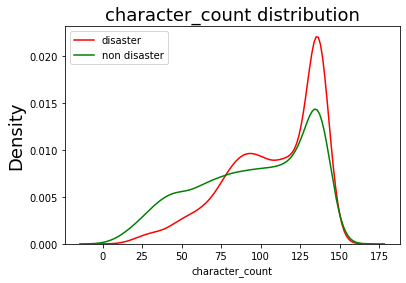

In [43]:
g = sns.distplot(train[train['target'] == 1]['character_count'], color = 'red', label = 'disaster', hist=False)
g = sns.distplot(train[train['target'] == 0]['character_count'], color = 'green', label = 'non disaster', hist=False)
g.set_title("character_count distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

In [ ]:
#el character count de los disaster tweets parece ser mas alto
#los non disaster tienen una densidad mas alta solo hasta los 75 caracteres, de ahi en adelante la densidad de los disaster tweets es mayor


Text(0, 0.5, 'Density')

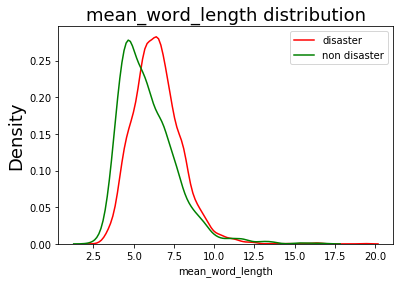

In [40]:
g = sns.distplot(train[train['target'] == 1]['mean_word_length'], color = 'red', label = 'disaster', hist=False)
g = sns.distplot(train[train['target'] == 0]['mean_word_length'], color = 'green', label = 'non disaster', hist=False)
g.set_title("mean_word_length distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

In [ ]:
#Denuevo los disaster tweets tienen maor densidad en los valores mas altos (a partir del 6.0 aproximadamente)

Text(0, 0.5, 'Density')

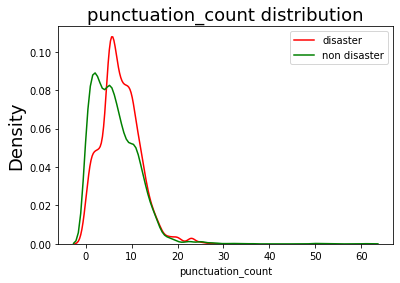

In [41]:
g = sns.distplot(train[train['target'] == 1]['punctuation_count'], color = 'red', label = 'disaster', hist=False)
g = sns.distplot(train[train['target'] == 0]['punctuation_count'], color = 'green', label = 'non disaster', hist=False)
g.set_title("punctuation_count distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

In [ ]:
#nos encontramos con lo mismo, esta vez a partir del 7 aproximadamente

Text(0.5, 1.0, 'Mean Word Length vs. Punctuation Count')

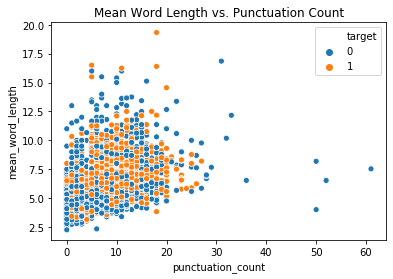

In [52]:
g = sns.scatterplot(x='punctuation_count', y='mean_word_length', data = train, hue= 'target')
g.set_title('Mean Word Length vs. Punctuation Count')

In [ ]:
#los disaster tweets se muestran mas acotados en los dos ejes, tienden a tener punctuation count maor a 5 y mean 
#word length mayor a 4 aproximadamente

#los non disaster parecen estar mas distribuidos pero lo que importa remarcar creo que es que los non disaster
#a valores mas bajos

Text(0.5, 1.0, 'Mean Word Length vs. Character Count')

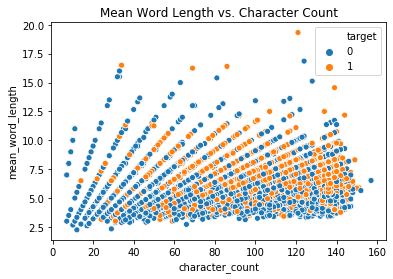

In [54]:
g = sns.scatterplot(x='character_count', y='mean_word_length', data = train, hue='target')
g.set_title('Mean Word Length vs. Character Count')

In [ ]:
#en este se puede ver que los disaster tweets tienden a estar concentrados entre los 70 caracteres y los 140
#y desde los 5 mean_word_length hasta los 10

#mientras que los non disaster se muestran un poco mas distribuidos con respecto a la cantidad de caracteres y 
#tienden a tener un mean_word_length mas bajo, entre el 2.5 y el 5


Text(0.5, 1.0, 'Character Count vs. Punctuation Count')

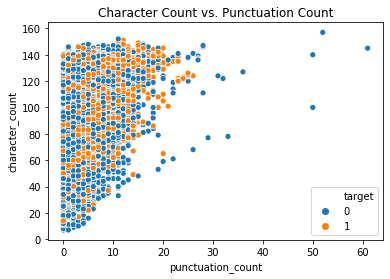

In [55]:
g = sns.scatterplot(x='punctuation_count', y='character_count', data = train, hue='target')
g.set_title('Character Count vs. Punctuation Count')

In [ ]:
#Denuevo los non disaster tienden a valores mas bajos

In [ ]:
#Calcular la mean character count